In [1]:
import pyodbc
import pandas as pd

server_name = 'AREMU\NAVDEMO'
database_name = 'Data360YP'

In [2]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client RDA 11.0',
 'SQL Server Native Client 11.0',
 'ODBC Driver 11 for SQL Server']

In [3]:
conn = pyodbc.connect(
"Driver={SQL Server Native Client 11.0};"
"Server=AREMU\\NAVDEMO;"
"Database=Data360YP;"
"Trusted_Connection=yes;"
)

In [4]:
sql_query = """
SELECT *
FROM account_lookup, Opportunities_Data, Calendar_lookup
WHERE Opportunities_Data.New_Account_No = account_lookup.New_Account_No 
AND Opportunities_Data.Est_Completion_Month_ID = Calendar_lookup.Month_ID
"""

In [5]:
df1 = pd.read_sql(sql_query, conn)

In [6]:
pd.options.display.max_columns = None
df1.head(10)

,New_Account_No,New_Account_Name,Industry,Sector,Account_Segment,Account_Manager_Alias,Segment_Manager,Industry_Manager,New_Account_No,Opportunity_ID,New_Opportunity_Name,Est_Completion_Month_ID,Product_Category,Opportunity_Stage,Est_Opportunity_Value,Date,Day_Name,Day_No,Week_ID,Week_No,Month_No,Year_No,Quarter_No,Quarter_ID,Month_ID,Week_Date,Month_Name,Fiscal_Month,Fiscal_Quarter,Fiscal_Year
0,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-01,Friday,5,400,35,9,2017,3,31,93,2017-08-28,September,"September, (2017)",FY17-Q3,FY17
1,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-02,Saturday,6,400,35,9,2017,3,31,93,2017-08-28,September,"September, (2017)",FY17-Q3,FY17
2,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-03,Sunday,7,400,35,9,2017,3,31,93,2017-08-28,September,"September, (2017)",FY17-Q3,FY17
3,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-04,Monday,1,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17
4,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-05,Tuesday,2,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17
5,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-06,Wednesday,3,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17
6,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-07,Thursday,4,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17
7,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-08,Friday,5,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17
8,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-09,Saturday,6,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17
9,465128211,TV-Partner,Insurance,Insurance Direct,SMB,CLWTVct,Tom F.,Lena I.,465128211,7-6DB5562,Phase - 4: Grow shareholder value,93,Project,Stage - 0,3000.0,2017-09-10,Sunday,7,401,36,9,2017,3,31,93,2017-09-04,September,"September, (2017)",FY17-Q3,FY17


In [23]:
df1.shape

(125763, 30)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125763 entries, 0 to 125762
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   New_Account_No           125763 non-null  object        
 1   New_Account_Name         125763 non-null  object        
 2   Industry                 125763 non-null  object        
 3   Sector                   125763 non-null  object        
 4   Account_Segment          125763 non-null  object        
 5   Account_Manager_Alias    125763 non-null  object        
 6   Segment_Manager          125763 non-null  object        
 7   Industry_Manager         125763 non-null  object        
 8   New_Account_No           125763 non-null  object        
 9   Opportunity_ID           125763 non-null  object        
 10  New_Opportunity_Name     125763 non-null  object        
 11  Est_Completion_Month_ID  125763 non-null  int64         
 12  Product_Category

In [44]:
pd.options.display.max_columns = None
df1.Year_No.unique

<bound method Series.unique of 0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
125758    2021
125759    2021
125760    2021
125761    2021
125762    2021
Name: Year_No, Length: 125763, dtype: int64>

<AxesSubplot:xlabel='Week_Date'>

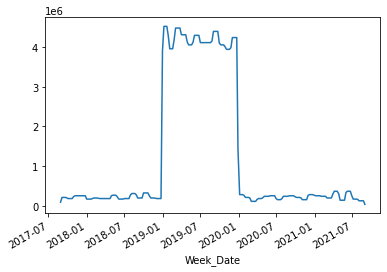

In [48]:
df1.groupby('Week_Date').sum()['Year_No'].plot()